Reactor: 73 Shield: 471 Outside: 456


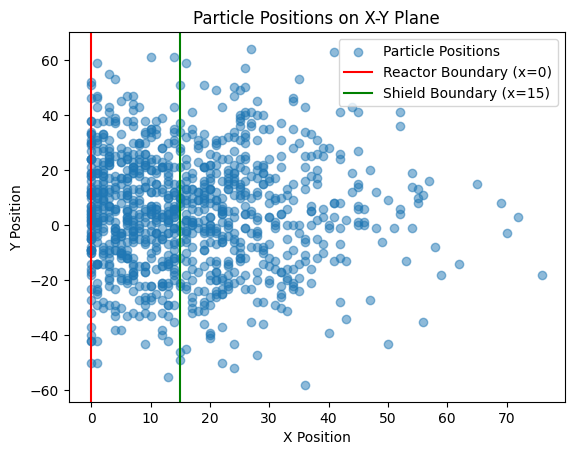

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits
import scipy.optimize as opt
class Particle:
    def __init__(self, energy, dir, shield_width):
        self.x = 0
        self.y = np.random.randint(low=0, high=10)
        self.energy = energy
        self.dir = dir
        self.shield_width = shield_width
        self.first_move = True  # Flag to check if it's the first move

    def hasPassedShield(self):
        # New method to check if particle has passed the shield
        if self.x > self.shield_width:
            return True
        return False

    def getPos(self):
        if self.x <= 0:
            return "Reactor"
        elif 0 < self.x <= self.shield_width:
            return "Shield"
        else:
            return "Outside"

    def changeDirection(self, relative_direction):
        direction_order = ["right", "down", "left", "up"]
        idx = direction_order.index(self.dir)
        if relative_direction == "left":
            self.dir = direction_order[(idx - 1) % 4]
        elif relative_direction == "right":
            self.dir = direction_order[(idx + 1) % 4]

    def move(self):
        probabilities = [0.5, 0.25, 0.25]
        movements = ["forward", "left", "right"]
        decision = np.random.choice(movements, p=probabilities)
        if self.first_move:
            self.x += 3
            self.energy -= 3  # Decrease energy by 1 unit per step
            self.first_move = False
            return

        if decision == "forward":
            self.energy -= 1
            if self.dir == "right":
                self.x += 1
            elif self.dir == "left":
                self.x -= 1
                if self.x<0:
                  self.x=0
            elif self.dir == "up":
                self.y += 1
            elif self.dir == "down":
                self.y -= 1
        else:
            self.energy -= np.random.choice([1.5, 2], p=[0.67, 0.33])
            self.changeDirection(decision)




# Simulation Loop
reactor, shield, outside = 0, 0, 0
shield_width = 15  # Parameterized shield width
positions=[]
for i in range(1000):
    n = Particle(800, "right", shield_width)
    while n.energy > 0:
        n.move()
    pos = n.getPos()
    positions.append([n.x,n.y])
    if pos == "Reactor":
        reactor += 1
    elif pos == "Shield":
        shield += 1
    elif pos == "Outside":
        outside += 1

print("Reactor:", reactor, "Shield:", shield, "Outside:", outside)

# Plotting
positions = np.array(positions)
plt.scatter(positions[:, 0], positions[:, 1], alpha=0.5, label='Particle Positions')

# Draw lines at x=0 and x=15
plt.axvline(x=0, color='r', linestyle='-', label='Reactor Boundary (x=0)')
plt.axvline(x=shield_width, color='g', linestyle='-', label='Shield Boundary (x=15)')

# Adding labels and title
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Particle Positions on X-Y Plane')
plt.legend()

# Show plot
plt.show()

Exponent a: 0.07151358445088371 ± [0.00226835]


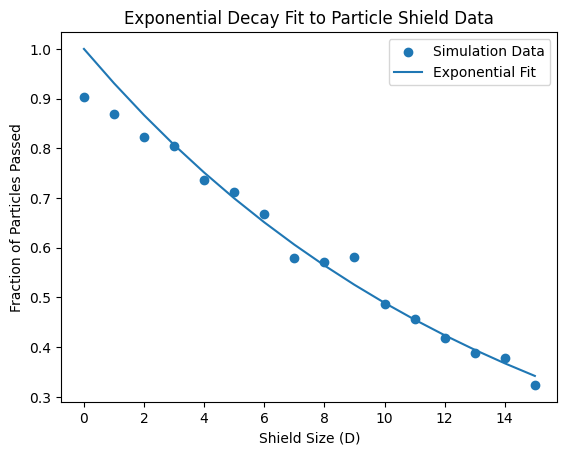

In [2]:
shield_widths = np.arange(0, 16, 1)
results = []

def exponential_decay(D, a):
    return np.exp(-a * D)

for D in shield_widths:
    passed_count = 0
    total_particles = 1000

    for _ in range(total_particles):
        n = Particle(500, "right", D)
        while n.energy > 0:
            n.move()
        if n.hasPassedShield():
            passed_count += 1

    results.append(passed_count / total_particles)  # Fraction of particles that passed

# Curve fitting to determine 'a'
popt, pcov = opt.curve_fit(exponential_decay, shield_widths, results)
a = popt[0]
a_error = np.sqrt(np.diag(pcov))

print(f"Exponent a: {a} ± {a_error}")

# Plotting
plt.scatter(shield_widths, results, label='Simulation Data')
plt.plot(shield_widths, exponential_decay(shield_widths, a), label='Exponential Fit')
plt.xlabel('Shield Size (D)')
plt.ylabel('Fraction of Particles Passed')
plt.title('Exponential Decay Fit to Particle Shield Data')
plt.legend()
plt.show()


Exponent a: 0.037174061135596875 ± [0.00277082]


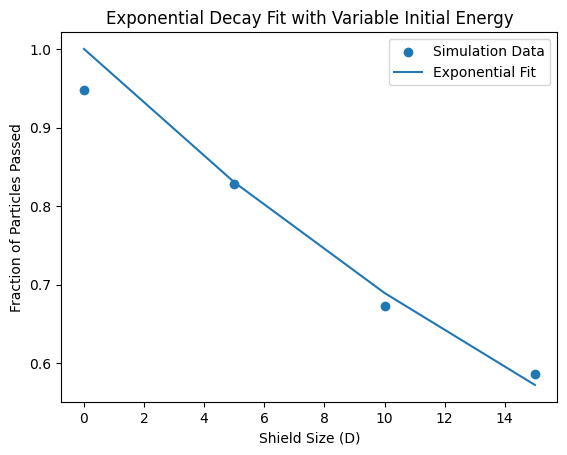

In [3]:
def create_particle_with_random_energy(mean_energy, std_dev, dir, shield_width):
    energy = np.random.normal(mean_energy, std_dev)
    return Particle(energy, dir, shield_width)

def exponential_decay(D, a):
    return np.exp(-a * D)

# Simulation parameters
mean_energy = 1500
std_dev_energy = 75
shield_widths = np.arange(0, 16, 5)
results = []

for D in shield_widths:
    passed_count = 0
    total_particles = 1000

    for _ in range(total_particles):
        n = create_particle_with_random_energy(mean_energy, std_dev_energy, "right", D)
        while n.energy > 0:
            n.move()
        if n.hasPassedShield():
            passed_count += 1

    results.append(passed_count / total_particles)

# Curve fitting to determine 'a'
popt, pcov = opt.curve_fit(exponential_decay, shield_widths, results)
a = popt[0]
a_error = np.sqrt(np.diag(pcov))

print(f"Exponent a: {a} ± {a_error}")

# Plotting
plt.scatter(shield_widths, results, label='Simulation Data')
plt.plot(shield_widths, exponential_decay(shield_widths, a), label='Exponential Fit')
plt.xlabel('Shield Size (D)')
plt.ylabel('Fraction of Particles Passed')
plt.title('Exponential Decay Fit with Variable Initial Energy')
plt.legend()
plt.show()